In [16]:
from astropy.io import fits
from simplespec.skysubtract import SkySubtractor
from simplespec.extractor import Extractor
from simplespec.utils import clean_cosmic_rays, plot_spec2d
import matplotlib.pyplot as plt

In [2]:
spectrum2D = fits.open("/Users/viraj/ZTF/2021-2-LSP-001.20230203/product/mbxgpP202302030219.fits")[1].data
spec_mask = (spectrum2D==0)

In [3]:
cleaned_spec2D = clean_cosmic_rays(spectrum2D)

INFO: Iteration 1: Found 8404 cosmic-ray pixels, Total: 8404 [lacosmic.core]
INFO: Iteration 2: Found 402 cosmic-ray pixels, Total: 8806 [lacosmic.core]
INFO: Iteration 3: Found 84 cosmic-ray pixels, Total: 8890 [lacosmic.core]
INFO: Iteration 4: Found 11 cosmic-ray pixels, Total: 8901 [lacosmic.core]


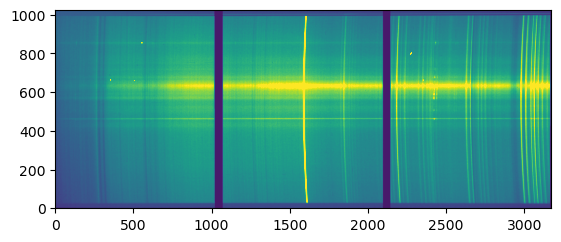

In [19]:
ax = plot_spec2d(cleaned_spec2D)
# ax.set_xlim(1570, 1600)
# ax.set_ylim(400, 500)

In [5]:
skysub = SkySubtractor(spectrum2D=cleaned_spec2D,
                       skyline_spectral_min=1570,
                       skyline_spectral_max=1600,
                       skyline_spatial_min=400,
                       skyline_spatial_max=500,
                       trace_spatial_min=50,
                       trace_spatial_max=70,
                       neartrace_spatial_min=45,
                       neartrace_spatial_max=80
                      )

In [6]:
skysub.fit_trace()

array([-2.05340534e-02,  2.27564356e+01])

<Axes: >

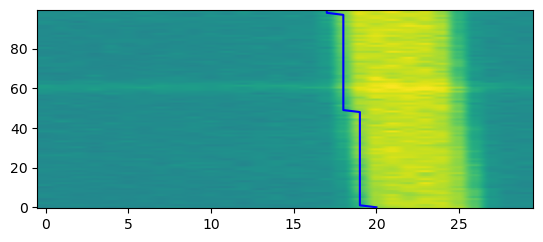

In [7]:
skysub.plot_trace(x=20)

<Axes: >

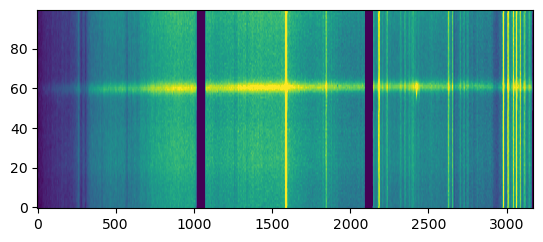

In [10]:
plot_spec2d(skysub.linearize_slant_spatial_profiles())

In [8]:
skysub_spec = skysub.subtract_sky()

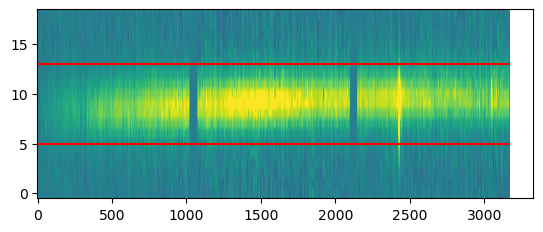

In [9]:
ax = plot_spec2d(skysub_spec)
ax.hlines(5, xmin=0, xmax=skysub_spec.shape[1], color='red')
ax.hlines(13, xmin=0, xmax=skysub_spec.shape[1], color='red')

In [12]:
extractor = Extractor(skysub_spec,
                     trace_extract_spatial_min=5,
                     trace_extract_spatial_max=13)

In [14]:
pixels, counts = extractor.extract_trace()

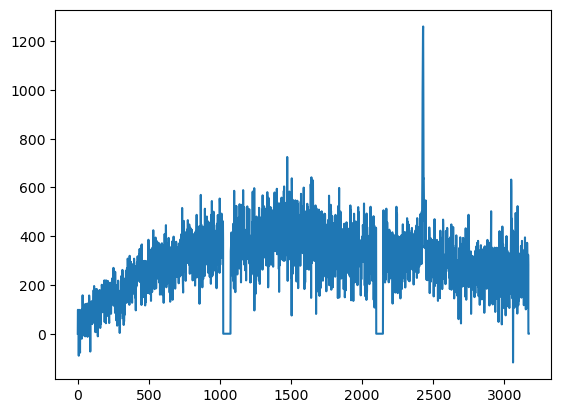

In [17]:
plt.figure()
plt.plot(pixels, counts)